In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [97]:
matches = pd.read_csv("matches.csv")
deliveries = pd.read_csv("deliveries.csv")

In [98]:
data = pd.merge(matches, deliveries, how="inner", left_on = 'id', right_on = 'match_id')

In [99]:
data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,2017,Hyderabad,4/5/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,2017,Hyderabad,4/5/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,2017,Hyderabad,4/5/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,2017,Hyderabad,4/5/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,2017,Hyderabad,4/5/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [89]:
data.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3', 'match_id', 'inning', 'batting_team', 'bowling_team', 'over',
       'ball', 'batsman', 'non_striker', 'bowler', 'is_super_over',
       'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179078 entries, 0 to 179077
Data columns (total 39 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                179078 non-null  int64 
 1   season            179078 non-null  int64 
 2   city              177378 non-null  object
 3   date              179078 non-null  object
 4   team1             179078 non-null  object
 5   team2             179078 non-null  object
 6   toss_winner       179078 non-null  object
 7   toss_decision     179078 non-null  object
 8   result            179078 non-null  object
 9   dl_applied        179078 non-null  int64 
 10  winner            178706 non-null  object
 11  win_by_runs       179078 non-null  int64 
 12  win_by_wickets    179078 non-null  int64 
 13  player_of_match   178706 non-null  object
 14  venue             179078 non-null  object
 15  umpire1           178578 non-null  object
 16  umpire2           178578 non-null  obj

In [103]:
sub1 = matches[(matches['team1'] == 'Mumbai Indians') & (matches['team2'] == 'Delhi Capitals')]

In [104]:
sub2 = matches[(matches['team2'] == 'Mumbai Indians') & (matches['team1'] == 'Delhi Capitals')]

In [105]:
all_matches = pd.concat([sub1 , sub2])

In [107]:
all_matches.shape

(24, 18)

In [108]:
all_matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
23,24,2017,Mumbai,4/22/2017,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,0,Mumbai Indians,14,0,MJ McClenaghan,Wankhede Stadium,A Nand Kishore,S Ravi,NaN
43,44,2017,Delhi,5/6/2017,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,0,Mumbai Indians,146,0,LMP Simmons,Feroz Shah Kotla,Nitin Menon,CK Nandan,NaN
81,82,2008,Mumbai,5/4/2008,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,0,Mumbai Indians,29,0,SM Pollock,Dr DY Patil Sports Academy,IL Howell,RE Koertzen,NaN
108,109,2008,Delhi,5/24/2008,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,5,KD Karthik,Feroz Shah Kotla,BF Bowden,K Hariharan,NaN
149,150,2009,East London,5/8/2009,Mumbai Indians,Delhi Capitals,Mumbai Indians,bat,normal,0,Delhi Capitals,0,7,A Nehra,Buffalo Park,M Erasmus,SK Tarapore,NaN


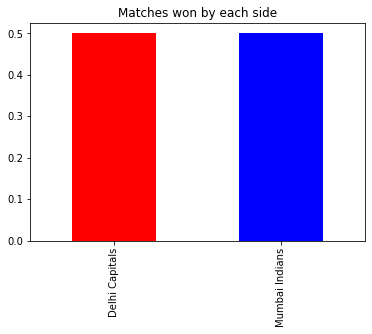

In [117]:
all_matches['winner'].value_counts(normalize = True).plot.bar(title = 'Matches won by each side', color = ['red', 'blue'])

In [124]:
all_matches.groupby(['winner'])['win_by_runs','win_by_wickets'].agg({'max', 'mean'})

win_by_runs      win_by_wickets    
                      mean  max           mean max
winner                                            
Delhi Capitals       11.00   37       3.750000   9
Mumbai Indians       44.75  146       1.083333   8

In [127]:
all_matches.groupby(['toss_decision', 'toss_winner'])['winner'].value_counts(normalize=True)

toss_decision  toss_winner     winner        
bat            Delhi Capitals  Mumbai Indians    0.666667
                               Delhi Capitals    0.333333
               Mumbai Indians  Delhi Capitals    0.500000
                               Mumbai Indians    0.500000
field          Delhi Capitals  Mumbai Indians    0.636364
                               Delhi Capitals    0.363636
               Mumbai Indians  Delhi Capitals    1.000000
Name: winner, dtype: float64

In [133]:
sub_data = data[(data['batting_team'] == 'Mumbai Indians') & (data['bowling_team'] == 'Delhi Capitals') & (data['batsman'] == 'RG Sharma')]

In [135]:
sub_data.shape

(426, 39)

In [145]:
sub_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
5547,24,2017,Mumbai,4/22/2017,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
5548,24,2017,Mumbai,4/22/2017,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
5549,24,2017,Mumbai,4/22/2017,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
5550,24,2017,Mumbai,4/22/2017,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
5551,24,2017,Mumbai,4/22/2017,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [137]:
sub_data['batsman'].unique()

array(['RG Sharma'], dtype=object)

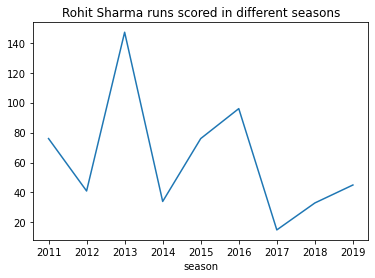

In [144]:
sub_data.groupby(['season'])['batsman_runs'].sum().plot(title = 'Rohit Sharma runs scored in different seasons')

In [161]:
sub_data.groupby(['match_id','season'])['batsman_runs'].agg({'sum'})

,,sum
match_id,season,
24,2017,5
44,2017,10
238,2011,27
282,2011,49
327,2012,29
342,2012,12
390,2013,74
408,2013,73
473,2014,4


In [159]:
print('Average runs scored by Rohit Sharma against Delhi Capitals is : {}'.format(round(sub_data.groupby(['match_id'])['batsman_runs'].sum().mean(),2)))

Average runs scored by Rohit Sharma against Delhi Capitals is : 31.28


In [172]:
sub_data1 = data[(data['batting_team'] == 'Mumbai Indians') & (data['bowling_team'] == 'Delhi Capitals') & (data['bowler'] == 'K Rabada')]

In [173]:
sub_data1.shape

(107, 39)

In [174]:
sub_data1.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
5512,24,2017,Mumbai,4/22/2017,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
5513,24,2017,Mumbai,4/22/2017,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,0,...,0,0,0,0,0,5,5,NaN,NaN,NaN
5514,24,2017,Mumbai,4/22/2017,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
5515,24,2017,Mumbai,4/22/2017,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
5516,24,2017,Mumbai,4/22/2017,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [165]:
sub_data1['bowler'].unique()

array(['K Rabada'], dtype=object)

In [178]:
sub_data2 = sub_data1[-sub_data1['player_dismissed'].isnull()]

In [195]:
print('Rabada against Mumbai Indians takes on an average : {} wickets'.format(round(sub_data2.groupby('match_id')['player_dismissed'].agg({'count'}).mean())[0]))

Rabada against Mumbai Indians takes on an average : 2.0 wickets


In [217]:
sub_data3 = data[(data['batting_team'] == 'Mumbai Indians') & (data['bowling_team'] == 'Delhi Capitals')]

In [218]:
sub_data4 = data[(data['batting_team'] == 'Delhi Capitals') & (data['bowling_team'] == 'Mumbai Indians')]

In [219]:
sub_data3 = sub_data3[sub_data3['wide_runs'] != 0]

In [227]:
sub_data3.groupby(['match_id'])['match_id'].count().mean()

4.75

In [222]:
sub_data4 = sub_data4[sub_data4['wide_runs'] != 0]

In [228]:
sub_data4.groupby(['match_id'])['match_id'].count().mean()

3.260869565217391